# Exploratory Data Analysis

## Introduction

## Introduction

In this notebook, I conducted an exploratory analysis of the e-commerce dataset to gain insights into the overall structure and characteristics of the data. I began by examining generic aspects, such as the dimensions of the DataFrame, the unique number of items in the e-commerce stock, and the number of unique customers visiting the website.

Following this initial exploration, I analyzed the total daily sales over time to understand sales trends and seasonality. Additionally, I investigated the global demographics of the customer base to identify where the majority of sales originated. This analysis provides a foundation for understanding both the temporal and geographic distribution of e-commerce sales.

Given this analysis, new opportunities emerged to apply machine learning techniques to this dataset. Leveraging insights from the initial exploration, machine learning could enable personalized recommendations, customer segmentation and demand forecasting.

In [ ]:
%matplotlib widget
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("../data/raw.xlsx")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
print(f"DataFrame dimensions\nrows: {df.shape[0]}, columns: {df.shape[1]}")

DataFrame dimensions
rows: 541909, columns: 8


Feature descriptions here :
https://archive.ics.uci.edu/dataset/352/online+retail

In [4]:
# Obtaining number of unique items
print(f"Number of unique stock items : {len(df['StockCode'].unique())}")

# Obtain number of unique customers on e-commerce
print(f"Number of unique customers purchasing from e-commerce store : {len(df['CustomerID'].unique())}")

# Obtaining of transaction made in data collection period
print(f"Number of transactions made between 1/12/2010 and 9/12/2011 : {len(df['InvoiceNo'].unique())}")

Number of unique stock items : 4070
Number of unique customers purchasing from e-commerce store : 4373
Number of transactions made between 1/12/2010 and 9/12/2011 : 25900


## Daily Sales over 1 year period

In this section, an analysis of sales made daily over the 1 year period will be analysed.

In [5]:
# Converting Invoice date to datetime and grouping for sales analysis.
df["InvoiceDate"] = pd.to_datetime(df['InvoiceDate'])

In [6]:
from datetime import datetime

# Create datetime object
dt = datetime.now()

# Creating new column consisting of only date.
df["Date"] = df["InvoiceDate"].dt.date

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01


In [7]:
# Calculate total sales by date
df['TotalSales'] = df['UnitPrice'] * df['Quantity']  # Create a new column for total sales
total_sales_by_date = df.groupby('Date')['TotalSales'].sum().reset_index()  # Group by date and sum the total sales
total_sales_by_date

,Date,TotalSales
0,2010-12-01,59286.02
1,2010-12-02,49289.48
2,2010-12-03,48266.96
3,2010-12-05,32165.95
4,2010-12-06,55800.74
...,...,...
300,2011-12-05,119732.60
301,2011-12-06,59198.05
302,2011-12-07,75802.10
303,2011-12-08,83572.22


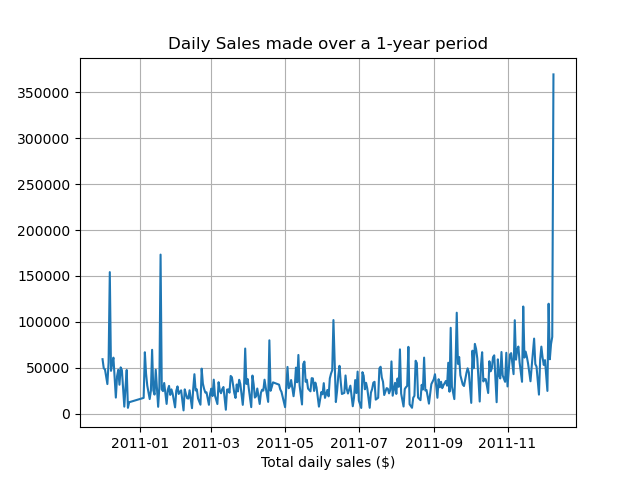

In [8]:
# Visualising daily sales

fig, ax =plt.subplots()
ax.plot(total_sales_by_date['Date'], total_sales_by_date['TotalSales'], linestyle='-')
ax.set_title("Daily Sales made over a 1-year period")
ax.set_xlabel("Date")
ax.set_xlabel("Total daily sales ($)")
plt.grid()
plt.show()

In [9]:
# Filter the DataFrame for dates in December 2010, to see what items where bought in those periods.
dec_2010_data = df[(df['InvoiceDate'] >= "2010-12-01") & (df['InvoiceDate'] <= "2010-12-31")]

# Filter the DataFrame for dates in June 2011
feb_2011_data = df[(df['InvoiceDate'] >= "2011-02-01") & (df['InvoiceDate'] <= "2011-02-28")]

# Filter the DataFrame for dates in June 2011
june_2011_data = df[(df['InvoiceDate'] >= "2011-06-01") & (df['InvoiceDate'] <= "2011-06-30")]

# Filter the DataFrame for dates in December 2011
dec_2011_data = df[(df['InvoiceDate'] >= "2011-12-01") & (df['InvoiceDate'] <= "2011-12-31")]

In [10]:
dec_2010_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34


In [11]:
for x in dec_2010_data['Description'].unique():
    print(x)

WHITE HANGING HEART T-LIGHT HOLDER
WHITE METAL LANTERN
CREAM CUPID HEARTS COAT HANGER
KNITTED UNION FLAG HOT WATER BOTTLE
RED WOOLLY HOTTIE WHITE HEART.
SET 7 BABUSHKA NESTING BOXES
GLASS STAR FROSTED T-LIGHT HOLDER
HAND WARMER UNION JACK
HAND WARMER RED POLKA DOT
ASSORTED COLOUR BIRD ORNAMENT
POPPY'S PLAYHOUSE BEDROOM 
POPPY'S PLAYHOUSE KITCHEN
FELTCRAFT PRINCESS CHARLOTTE DOLL
IVORY KNITTED MUG COSY 
BOX OF 6 ASSORTED COLOUR TEASPOONS
BOX OF VINTAGE JIGSAW BLOCKS 
BOX OF VINTAGE ALPHABET BLOCKS
HOME BUILDING BLOCK WORD
LOVE BUILDING BLOCK WORD
RECIPE BOX WITH METAL HEART
DOORMAT NEW ENGLAND
JAM MAKING SET WITH JARS
RED COAT RACK PARIS FASHION
YELLOW COAT RACK PARIS FASHION
BLUE COAT RACK PARIS FASHION
BATH BUILDING BLOCK WORD
ALARM CLOCK BAKELIKE PINK
ALARM CLOCK BAKELIKE RED 
ALARM CLOCK BAKELIKE GREEN
PANDA AND BUNNIES STICKER SHEET
STARS GIFT TAPE 
INFLATABLE POLITICAL GLOBE 
VINTAGE HEADS AND TAILS CARD GAME 
SET/2 RED RETROSPOT TEA TOWELS 
ROUND SNACK BOXES SET OF4 WOODLAND 
SPA

In [12]:
feb_2011_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,TotalSales
77628,542776,21671,RED SPOT CERAMIC DRAWER KNOB,48,2011-02-01 08:23:00,1.25,15240.0,United Kingdom,2011-02-01,60.00
77629,542776,21668,RED STRIPE CERAMIC DRAWER KNOB,12,2011-02-01 08:23:00,1.25,15240.0,United Kingdom,2011-02-01,15.00
77630,542776,21670,BLUE SPOT CERAMIC DRAWER KNOB,12,2011-02-01 08:23:00,1.25,15240.0,United Kingdom,2011-02-01,15.00
77631,542776,17013D,ORIGAMI ROSE INCENSE IN TUBE,96,2011-02-01 08:23:00,0.42,15240.0,United Kingdom,2011-02-01,40.32
77632,542776,17096,ASSORTED LAQUERED INCENSE HOLDERS,48,2011-02-01 08:23:00,0.21,15240.0,United Kingdom,2011-02-01,10.08


In [13]:
for x in feb_2011_data['Description'].unique():
    print(x)

RED SPOT CERAMIC DRAWER KNOB
RED STRIPE CERAMIC DRAWER KNOB
BLUE SPOT CERAMIC DRAWER KNOB
ORIGAMI ROSE INCENSE IN TUBE
ASSORTED LAQUERED INCENSE HOLDERS
HEART OF WICKER SMALL
6 RIBBONS RUSTIC CHARM
CHILLI LIGHTS
RED RETROSPOT CAKE STAND
HOT WATER BOTTLE I AM SO POORLY
PAPER CHAIN KIT RETROSPOT
NAMASTE SWAGAT INCENSE
RED SPOTTY BISCUIT TIN
RETROSPOT HEART HOT WATER BOTTLE
AIRLINE BAG VINTAGE JET SET RED
AIRLINE BAG VINTAGE TOKYO 78
FIRST CLASS LUGGAGE TAG 
RED RETROSPOT LUGGAGE TAG
SET/4 RED MINI ROSE CANDLE IN BOWL
S/4 PINK FLOWER CANDLES IN BOWL
DOORMAT TOPIARY
DOORMAT MULTICOLOUR STRIPE
DOORMAT HEARTS
WATERING CAN BLUE ELEPHANT
WATERING CAN GREEN DINOSAUR
VICTORIAN SEWING BOX MEDIUM
VICTORIAN SEWING BOX SMALL 
PLEASE ONE PERSON METAL SIGN
COOK WITH WINE METAL SIGN 
METAL SIGN TAKE IT OR LEAVE IT 
GINGHAM HEART  DOORSTOP RED
DOORSTOP RETROSPOT HEART
CLASSICAL ROSE CANDLESTAND
RED HANGING HEART T-LIGHT HOLDER
LOVE HEART SOCK HANGER
BATHROOM SET LOVE HEART DESIGN
S/4 VALENTINE DECOUPAGE

In [14]:
june_2011_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,TotalSales
209029,555156,23299,FOOD COVER WITH BEADS SET 2,6,2011-06-01 07:37:00,3.75,15643.0,United Kingdom,2011-06-01,22.50
209030,555156,22847,BREAD BIN DINER STYLE IVORY,1,2011-06-01 07:37:00,16.95,15643.0,United Kingdom,2011-06-01,16.95
209031,555157,23075,PARLOUR CERAMIC WALL HOOK,16,2011-06-01 07:38:00,4.15,15643.0,United Kingdom,2011-06-01,66.40
209032,555157,47590B,PINK HAPPY BIRTHDAY BUNTING,6,2011-06-01 07:38:00,5.45,15643.0,United Kingdom,2011-06-01,32.70
209033,555157,22423,REGENCY CAKESTAND 3 TIER,4,2011-06-01 07:38:00,12.75,15643.0,United Kingdom,2011-06-01,51.00


In [15]:
for x in june_2011_data['Description'].unique():
    print(x)

FOOD COVER WITH BEADS SET 2 
BREAD BIN DINER STYLE IVORY
PARLOUR CERAMIC WALL HOOK
PINK HAPPY BIRTHDAY BUNTING
REGENCY CAKESTAND 3 TIER
BLUE HAPPY BIRTHDAY BUNTING
BREAD BIN DINER STYLE MINT
PARTY BUNTING
BATHROOM METAL SIGN
CLASSIC GLASS COOKIE JAR
FAIRY TALE COTTAGE NIGHTLIGHT
SET 10 NIGHT OWL LIGHTS
SET 6 PAPER TABLE LANTERN HEARTS 
SET 6 PAPER TABLE LANTERN STARS 
BABUSHKA LIGHTS STRING OF 10
PAPER CHAIN KIT EMPIRE
PAPER CHAIN KIT RETROSPOT
SET OF 10 LED DOLLY LIGHTS
ASSORTED COLOUR MINI CASES
BAKING SET 9 PIECE RETROSPOT 
MINI PAINT SET VINTAGE 
FELTCRAFT CUSHION RABBIT
FELTCRAFT CUSHION OWL
FELTCRAFT DOLL EMILY
FELTCRAFT DOLL MOLLY
PINK FLORAL FELTCRAFT SHOULDER BAG
FELTCRAFT 6 FLOWER FRIENDS
BUNDLE OF 3 RETRO NOTE BOOKS
BUNDLE OF 3 SCHOOL EXERCISE BOOKS  
SET 7 BABUSHKA NESTING BOXES
MAKE YOUR OWN PLAYTIME CARD KIT
MAKE YOUR OWN FLOWERPOWER CARD KIT
MAKE YOUR OWN MONSOON CARD KIT
36 PENCILS TUBE SKULLS
36 PENCILS TUBE WOODLAND
36 PENCILS TUBE RED RETROSPOT
PACK OF 6 PANNETONE GI

In [16]:
dec_2011_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,TotalSales
516384,C579889,23245,SET OF 3 REGENCY CAKE TINS,8,2011-12-01 08:12:00,4.15,13853.0,United Kingdom,2011-12-01,33.20
516385,C579890,84947,ANTIQUE SILVER TEA GLASS ENGRAVED,1,2011-12-01 08:14:00,1.25,15197.0,United Kingdom,2011-12-01,1.25
516386,C579890,23374,RED SPOT PAPER GIFT BAG,1,2011-12-01 08:14:00,0.82,15197.0,United Kingdom,2011-12-01,0.82
516387,C579890,84945,MULTI COLOUR SILVER T-LIGHT HOLDER,2,2011-12-01 08:14:00,0.85,15197.0,United Kingdom,2011-12-01,1.70
516388,C579891,23485,BOTANICAL GARDENS WALL CLOCK,1,2011-12-01 08:18:00,25.00,13644.0,United Kingdom,2011-12-01,25.00


In [17]:
for x in dec_2011_data['Description'].unique():
    print(x)

SET OF 3 REGENCY CAKE TINS
ANTIQUE SILVER TEA GLASS ENGRAVED
RED SPOT PAPER GIFT BAG
MULTI COLOUR SILVER T-LIGHT HOLDER
BOTANICAL GARDENS WALL CLOCK 
FRENCH STYLE STORAGE JAR CAFE 
SWEETHEART BIRD HOUSE
CERAMIC CAKE STAND + HANGING CAKES
GLASS APOTHECARY BOTTLE PERFUME
EGG CUP HENRIETTA HEN CREAM 
BOX OF 6 MINI 50'S CRACKERS
MEDIUM PARLOUR PICTURE FRAME 
BOX OF 6 CHRISTMAS CAKE DECORATIONS
CHILDRENS CUTLERY SPACEBOY 
JUMBO BAG VINTAGE DOILY 
HEART OF WICKER LARGE
ANGEL DECORATION STARS ON DRESS
HOMEMADE JAM SCENTED CANDLES
GARDENERS KNEELING PAD KEEP CALM 
BOX OF VINTAGE JIGSAW BLOCKS 
PINK FLORAL FELTCRAFT SHOULDER BAG
SET OF 6 RIBBONS PERFECTLY PRETTY  
COLOURED GLASS STAR T-LIGHT HOLDER
SET OF 2 TRAYS HOME SWEET HOME
NATURAL SLATE HEART CHALKBOARD 
ROTATING SILVER ANGELS T-LIGHT HLDR
HEART SHAPED HOLLY WREATH
WOODEN HEART CHRISTMAS SCANDINAVIAN
MAGNETS PACK OF 4 VINTAGE COLLAGE
GINGHAM HEART DECORATION
LUNCH BAG PAISLEY PARK  
GUMBALL COAT RACK
JUMBO BAG PAISLEY PARK
SPOTTY BUNTING


## Key Time Periods of Sales Spikes

Certain months in our sales data show significant spikes, aligning with popular holidays and seasonal events. Here’s a breakdown of these periods:

### 🎄 December 2010 & December 2011: Christmas Season
- **Reason**: December is traditionally the peak time for gift-giving, with people purchasing items for family and friends.
- **Effect**: Sales tend to surge as shoppers look for Christmas gifts, holiday decorations, and seasonal items, making December one of the highest-selling months each year.

### 💖 February 2011: Valentine’s Day
- **Reason**: Valentine’s Day on February 14th prompts gift-giving among couples.
- **Effect**: Sales for items like chocolates, flowers, jewelry, and other romantic/miscellaneous gifts increase significantly in the weeks leading up to Valentine’s Day.

### Mid-year: Summer Sales
- **Reason**: June may show a rise in early summer sales or mid-year events and gatherings.
- **Effect**: The spike in June could reflect purchases for family get-togethers, gifts, or other seasonal celebrations.


In [18]:
print(f"The best selling item in this period was : {df['Description'].mode()}")

The best selling item in this period was : 0    WHITE HANGING HEART T-LIGHT HOLDER
Name: Description, dtype: object


## Sales by Country

In [19]:
print(f"Number of countries : {len(df['Country'].unique())}")

Number of countries : 38


In [22]:
sales_by_country = df.groupby("Country")["TotalSales"].sum().reset_index()
sales_by_country

,Country,TotalSales
0,Australia,139965.350
1,Austria,10243.040
2,Bahrain,959.880
3,Belgium,41481.720
4,Brazil,1143.600
5,Canada,3666.380
6,Channel Islands,20814.590
7,Cyprus,14234.470
8,Czech Republic,945.760
9,Denmark,19142.540


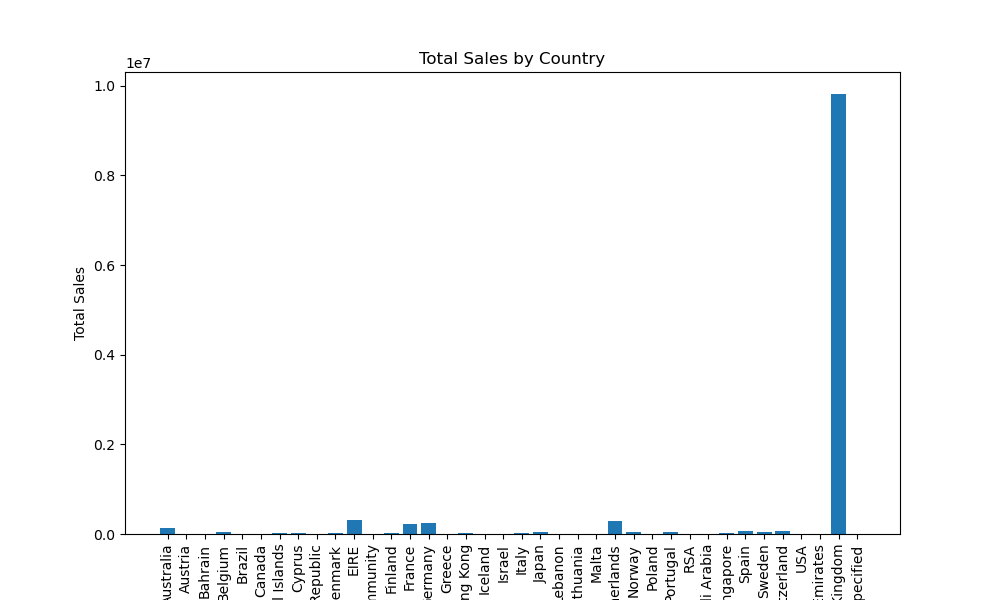

In [26]:
# Plotting total sales by country
plt.figure(figsize=(10, 6)) 
plt.bar(sales_by_country['Country'], sales_by_country['TotalSales'])
plt.xlabel('Country')  # X-axis label
plt.ylabel('Total Sales')  # Y-axis label
plt.title('Total Sales by Country')  # Title of the plot
plt.xticks(rotation=90)  # Rotate country names for readability
plt.show()

The customer base is predominantly in the UK, which could be attributed to heavy marketing within the region as well as the following factors:

1. **Localized Product Offering**: The products or services may be tailored to UK preferences, trends, or needs, making them more appealing to UK customers compared to international markets.

2. **Logistical Advantages**: Operating in the UK could mean faster delivery times, lower shipping costs, and fewer logistical barriers, which can enhance customer satisfaction and make the market more attractive.

3. **Regulatory Compliance**: The business may already comply with UK regulations, making it easier to operate within the region. Expanding internationally often requires navigating complex compliance standards, which could be a limiting factor.

4. **Established Brand Recognition**: The brand may be well-known and trusted in the UK, making it easier to retain customers. Expanding to new markets might require substantial efforts to build brand recognition from scratch.

5. **Currency Stability and Familiarity**: Transacting in GBP (British Pounds) reduces currency conversion issues for both the business and its UK-based customers, creating a smoother purchasing experience.

6. **Cultural Relevance and Marketing Alignment**: The brand’s marketing strategies, promotions, and messaging may be culturally relevant to the UK audience, resonating better with local consumers than with an international audience.

7. **Focused Advertising Spend**: Marketing efforts might be heavily concentrated in the UK, where the business has reliable data, insights, and channels, maximizing advertising efficiency and customer reach within the country.

8. **Partnerships with Local Retailers or Distributors**: The business may have partnerships with UK retailers or distributors, helping to expand its presence in the market and providing customers with more purchasing options.

9. **Targeted Loyalty Programs**: The company might offer loyalty programs or incentives that are specific to UK customers, which could drive higher retention and repeat purchases within the UK market.

10. **Established Customer Service and Support Infrastructure**: Having dedicated customer service for the UK market can enhance the overall customer experience and loyalty, as customers feel more supported with local assistance and support.

Each of these factors could contribute to a concentrated UK customer base, and focusing on these strengths could continue to build loyalty and market share within the region.


## Summary of Machine Learning Projects

The following machine learning projects will be carried out to further analyze and leverage the e-commerce data:

- **Time Series Analysis**: Forecasting sales for 2012 using ARIMA and LSTM models to understand future sales trends.
- **Customer Segmentation**: Segmenting customers based on purchasing behavior using K-Nearest Neighbors and Random Forests, allowing for targeted marketing and personalized experiences.
- **Recommender System**: Developing a product recommendation system to provide personalized product suggestions to users.

These projects aim to enhance business insights and enable data-driven decision-making within the e-commerce platform.